<a href="https://colab.research.google.com/github/vish7715/vish7715.github.io/blob/main/yelp_business_search.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[{'id': 'fkqruZUqJXLQ2X7ZbFVYOw', 'alias': 'taqueria-los-compadres-mexican-food-boston', 'name': 'Taqueria Los Compadres Mexican Food', 'image_url': 'https://s3-media2.fl.yelpcdn.com/bphoto/tl_-6sQr-nJNlujPdH3LMw/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/taqueria-los-compadres-mexican-food-boston?adjust_creative=4Jr81-Bon3cYrVBEWd1i8w&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=4Jr81-Bon3cYrVBEWd1i8w', 'review_count': 12, 'categories': [{'alias': 'mexican', 'title': 'Mexican'}], 'rating': 4.6, 'coordinates': {'latitude': 42.357122, 'longitude': -71.059672}, 'transactions': ['delivery', 'pickup'], 'location': {'address1': '26 Province St', 'address2': None, 'address3': '', 'city': 'Boston', 'zip_code': '02108', 'country': 'US', 'state': 'MA', 'display_address': ['26 Province St', 'Boston, MA 02108']}, 'phone': '+18572653017', 'display_phone': '(857) 265-3017', 'distance': 1403.7191457221209, 'business_hours': [{'open': [{'is_overnight': False

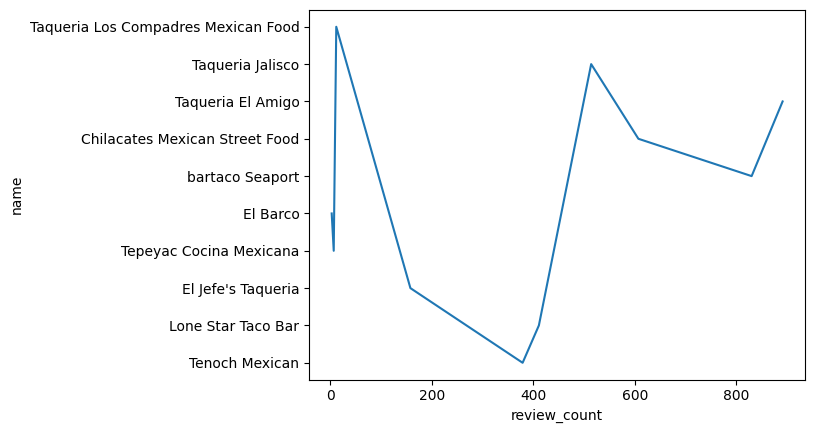

In [ ]:
### build a python script to scrape data from Yelp using yelp developer /API key ###
import requests
## Store API KEY ##

Api_Key='uP5UNyDWubrKAp9Y0t358hdWGs5QoOZiXdXYePOjs0rCROPUMiFkP7jrsmsCYUJN7OlKooFQxI34V4vxif9dfcsNEl-rZEbkgBG1v2wLCftdAS7llpwhS4VkcKIoaHYx'
headers ={'Authorization': f'BEARER {Api_Key}'}
base_url = 'https://api.yelp.com/v3/businesses/search'

## define method to search for yelp business ###
def yelp_business(term,location,limit=10):

    params= {
        'term': term,
        'location' : location,
        'limit' : limit
      }

    response = requests.get(base_url,params=params,headers=headers)
    return response.json()
##  test the method ##
yelp_business('taco','Boston')

### analyse the data using pandas ###
import pandas as pd
data=yelp_business('taco','Boston')
data.get('businesses')
print(data.get('businesses'))
df = pd.json_normalize(data.get('businesses'))
##print(df.columns)
#print(df[['name','rating','location.city','price']].sort_values(by='rating',ascending=False).head())

## filter the dataframe with required columns ##
columns=['name','rating','review_count','location.city','location.state','price','categories']
df_filter=df[columns]
##print( df_filter)

## best by review count ##
df_filter.sort_values(by='review_count',ascending=False)
## highest review count ##
max_review=df_filter['review_count'].max()
## use boolean indexing ##
highest_review_restaurant = df_filter[df_filter['review_count']==max_review]
### fetching the name ###
print('highest review is for --',highest_review_restaurant['name'].iloc[0])

## best restaurant by rating ##
df_filter.sort_values(by='rating',ascending=False)

## find the max rating
max_rating = df_filter['rating'].max()

## use boolean indexing to get the name for the restaurant with max rating ##
rest_by_rating = df_filter[df_filter['rating']==max_rating]

## use number indexing to get the 1st record
rest_name = rest_by_rating['name'].iloc[0]
print('best restaurant by rating --',rest_name)
### Visualize the data ###
import matplotlib.pyplot as plt
import seaborn as sns
sns.lineplot(data=df_filter,y='name',x='review_count')
plt.show()